# Regressão Múltipla



#### Previsão de renda 



|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import tree
import seaborn as sns
import pandas as pd
import numpy as np
import graphviz

In [2]:

prev_renda = pd.read_csv('previsao_de_renda.csv').drop(['Unnamed: 0','id_cliente', 'data_ref'], 
                                               axis = 1).dropna().drop_duplicates().reset_index(drop = True)

prev_renda.sexo = prev_renda.sexo.map({'M' : 0, 'F': 1})

prev_renda.posse_de_imovel = prev_renda.posse_de_imovel.map({True : 0, False: 1})

prev_renda.posse_de_veiculo = prev_renda.posse_de_veiculo.map({True : 0, False: 1})

previsao_de_renda_dammy = prev_renda.copy()

previsao_de_renda_dammy = pd.get_dummies(previsao_de_renda_dammy[[
                                                    'sexo', 
                                                    'posse_de_veiculo', 
                                                    'posse_de_imovel', 
                                                    'qtd_filhos', 
                                                    'tipo_renda', 
                                                    'educacao', 
                                                    'estado_civil', 
                                                    'tipo_residencia', 
                                                    'idade', 
                                                    'tempo_emprego', 
                                                    'qt_pessoas_residencia',  
                                                    'renda']], 
                                  drop_first = True).rename(columns = {
                                                    'tipo_renda_Servidor público':'tipo_renda_Servidor_público', 
                                                    'educacao_Pós graduação':'educacao_Pós_graduação', 
                                                    'educacao_Superior completo':'educacao_Superior_completo', 
                                                    'educacao_Superior incompleto':'educacao_Superior_incompleto', 
                                                    'tipo_residencia_Com os pais':'tipo_residencia_Com_os_pais'})


1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).
2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?
3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?
4. Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?
5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?
6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.
7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).

In [3]:

y = previsao_de_renda_dammy.renda

X = previsao_de_renda_dammy.drop('renda', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size=0.75, random_state=2360873)


2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?

In [4]:

# R^2 com alpha = 0 --> 0.251
# R^2 com alpha = 0.001 --> 0.251
# R^2 com alpha = 0.005 --> 0.251
# R^2 com alpha = 0.01 --> 0.251
# R^2 com alpha = 0.05 --> 0.251
# R^2 com alpha = 0.1 --> 

regul_ridge = '''
                renda ~ 
                sexo + 
                posse_de_veiculo + 
                posse_de_imovel + 
                qtd_filhos + 
                idade + 
                tempo_emprego + 
                qt_pessoas_residencia + 
                tipo_renda_Bolsista + 
                tipo_renda_Empresário + 
                tipo_renda_Pensionista + 
                tipo_renda_Servidor_público +
                educacao_Pós_graduação +
                educacao_Secundário +
                educacao_Superior_completo + 
                educacao_Superior_incompleto + 
                estado_civil_Separado +
                estado_civil_Solteiro +
                estado_civil_União +
                estado_civil_Viúvo +
                tipo_residencia_Casa +
                tipo_residencia_Com_os_pais +
                tipo_residencia_Comunitário +
                tipo_residencia_Estúdio +
                tipo_residencia_Governamental
                
            '''

md = smf.ols(regul_ridge, data = previsao_de_renda_dammy)

reg_ridge = md.fit_regularized(method = 'elastic_net',refit = True, L1_wt = 0.01, alpha = 0)

reg_ridge.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     115.5
Date:                Fri, 28 Jan 2022   Prob (F-statistic):               0.00
Time:                        07:59:43   Log-Likelihood:                -89881.
No. Observations:                8655   AIC:                         1.798e+05
Df Residuals:                    8630   BIC:                         1.800e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      1694.2146   3003.573      0.564      0.573   -4193.507    7581.936
sexo                          -6179.7918    190.759    -32.396      0.000   -6553.725   -5805.859
posse_de_veiculo               -127.9616    184.307     -0.694      0.488    -489.248     233.325
posse_de_imovel                -361.8763    182.345     -1.985      0.047    -719.315      -4.438
qtd_filhos                     -946.7140   1370.297     -0.691      0.490   -3632.824    1739.396
idade                            43.1767     10.414      4.146      0.000      22.764      63.590
tempo_emprego                   550.2607     13.481     40.818      0.000     523.835     576.686
qt_pessoas_residencia          1053.6896   1367.343      0.771      0.441   -1626.629    3734.009
tipo_renda_Bolsista            -988.6092   2972.738     -0.333      0.739   -6815.886    4838.667
tipo_renda_Empresário           893.7417    195.253      4.577      0.000     510.998    1276.485
tipo_renda_Pensionista        -1805.2640   3513.086     -0.514      0.607   -8691.752    5081.224
tipo_renda_Servidor_público     201.8973    290.053      0.696      0.486    -366.676     770.471
educacao_Pós_graduação         1028.8091   2314.179      0.445      0.657   -3507.535    5565.153
educacao_Secundário             322.1815    976.762      0.330      0.742   -1592.505    2236.868
educacao_Superior_completo      888.8994    979.976      0.907      0.364   -1032.087    2809.886
educacao_Superior_incompleto    -59.0686   1054.548     -0.056      0.955   -2126.234    2008.097
estado_civil_Separado           810.4491   1412.136      0.574      0.566   -1957.675    3578.573
estado_civil_Solteiro           591.0509   1382.902      0.427      0.669   -2119.767    3301.869
estado_civil_União             -452.9634    319.976     -1.416      0.157   -1080.193     174.266
estado_civil_Viúvo              804.0563   1473.331      0.546      0.585   -2084.025    3692.137
tipo_residencia_Casa           -364.0390    702.800     -0.518      0.604   -1741.695    1013.617
tipo_residencia_Com_os_pais    -362.9751    783.835     -0.463      0.643   -1899.478    1173.528
tipo_residencia_Comunitário    -481.1604   1377.967     -0.349      0.727   -3182.305    2219.984
tipo_residencia_Estúdio         179.6589   1224.854      0.147      0.883   -2221.347    2580.665
tipo_residencia_Governamental   -89.5900    856.233     -0.105      0.917   -1768.012    1588.832
==============================================================================
Omnibus:                    12794.250   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8893765.506
Skew:                           8.788   Prob(JB):                         0.00
Kurtosis:              

3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?

In [5]:

# R^2 com alpha = 0 --> 0.251
# R^2 com alpha = 0.001 --> 0.251
# R^2 com alpha = 0.005 --> 0.251
# R^2 com alpha = 0.01 --> 0.251
# R^2 com alpha = 0.05 --> 0.251
# R^2 com alpha = 0.1 --> 0.251


# Os R^2 não sofreram alterações

reg_lasso = md.fit_regularized(method = 'elastic_net',refit = True, L1_wt = 1, alpha = 0.1)

reg_lasso.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     125.6
Date:                Fri, 28 Jan 2022   Prob (F-statistic):               0.00
Time:                        07:59:49   Log-Likelihood:                -89881.
No. Observations:                8655   AIC:                         1.798e+05
Df Residuals:                    8632   BIC:                         1.800e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      1732.1027   2951.687      0.587      0.557   -4053.908    7518.114
sexo                          -6179.8040    190.589    -32.425      0.000   -6553.405   -5806.203
posse_de_veiculo               -128.0951    184.187     -0.695      0.487    -489.145     232.955
posse_de_imovel                -363.8083    182.294     -1.996      0.046    -721.149      -6.468
qtd_filhos                     -945.3476   1370.160     -0.690      0.490   -3631.189    1740.494
idade                            43.1422     10.404      4.147      0.000      22.747      63.538
tempo_emprego                   550.2218     13.477     40.828      0.000     523.804     576.639
qt_pessoas_residencia          1053.2865   1367.210      0.770      0.441   -1626.772    3733.345
tipo_renda_Bolsista            -985.1779   2972.434     -0.331      0.740   -6811.858    4841.503
tipo_renda_Empresário           897.5211    195.122      4.600      0.000     515.035    1280.008
tipo_renda_Pensionista        -1805.9448   3512.746     -0.514      0.607   -8691.765    5079.876
tipo_renda_Servidor_público     201.7838    290.025      0.696      0.487    -366.735     770.302
educacao_Pós_graduação                 0          0        nan        nan           0           0
educacao_Secundário             159.0634    885.969      0.180      0.858   -1577.647    1895.773
educacao_Superior_completo      722.3165    889.748      0.812      0.417   -1021.802    2466.435
educacao_Superior_incompleto   -223.7452    971.455     -0.230      0.818   -2128.028    1680.538
estado_civil_Separado           809.4639   1411.986      0.573      0.566   -1958.366    3577.294
estado_civil_Solteiro           596.3226   1382.736      0.431      0.666   -2114.171    3306.816
estado_civil_União             -453.1903    319.888     -1.417      0.157   -1080.248     173.867
estado_civil_Viúvo              795.0156   1473.103      0.540      0.589   -2092.619    3682.650
tipo_residencia_Casa           -235.6475    608.109     -0.388      0.698   -1427.687     956.392
tipo_residencia_Com_os_pais    -236.5871    701.199     -0.337      0.736   -1611.105    1137.931
tipo_residencia_Comunitário            0          0        nan        nan           0           0
tipo_residencia_Estúdio         308.0005   1173.103      0.263      0.793   -1991.562    2607.563
tipo_residencia_Governamental    36.1061    780.148      0.046      0.963   -1493.171    1565.383
==============================================================================
Omnibus:                    12794.253   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8893736.415
Skew:                           8.788   Prob(JB):                         0.00
Kurtosis:              

4. Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?

In [6]:
# Este código é de "David Dale", fizemos apenas pequenos ajustes

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    
    included = list(initial_list)
    
    while True:
        
        changed=False
        
        excluded = list(set(X.columns)-set(included))
        
        new_pval = pd.Series(index=excluded, dtype=np.dtype('float64'))
        
        for new_column in excluded:
            
            print(included+[new_column])
            
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            
            new_pval[new_column] = model.pvalues[new_column]
            
        best_pval = new_pval.min()
        
        if best_pval < threshold_in:
            
            best_feature = new_pval.index[new_pval.argmin()]
            
            included.append(best_feature)
            
            changed=True
            
            if verbose:
                
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        print(included)
        
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
    
        pvalues = model.pvalues.iloc[1:]
        
        worst_pval = pvalues.max() 
        
        if worst_pval > threshold_out:
            
            changed=True
            
            worst_feature = pvalues.argmax()
            
            included.remove(worst_feature)
            
            if verbose:
                
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
                
        if not changed:
            
            break
            
    return included


In [7]:
result = stepwise_selection(X, y)

print('resulting features:')

print(result)

['tipo_renda_Pensionista']
['sexo']
['tipo_renda_Bolsista']
['tipo_residencia_Com_os_pais']
['estado_civil_União']
['educacao_Superior_incompleto']
['tipo_residencia_Casa']
['educacao_Secundário']
['posse_de_veiculo']
['idade']
['educacao_Superior_completo']
['tipo_renda_Empresário']
['qt_pessoas_residencia']
['estado_civil_Viúvo']
['estado_civil_Solteiro']
['tipo_residencia_Estúdio']
['educacao_Pós_graduação']
['posse_de_imovel']
['qtd_filhos']
['tempo_emprego']
['tipo_renda_Servidor_público']
['tipo_residencia_Governamental']
['tipo_residencia_Comunitário']
['estado_civil_Separado']
Add  tempo_emprego                  with p-value 1.21742e-287
['tempo_emprego']
['tempo_emprego', 'tipo_renda_Pensionista']
['tempo_emprego', 'sexo']
['tempo_emprego', 'tipo_renda_Bolsista']
['tempo_emprego', 'tipo_residencia_Com_os_pais']
['tempo_emprego', 'estado_civil_União']
['tempo_emprego', 'educacao_Superior_incompleto']
['tempo_emprego', 'tipo_residencia_Casa']
['tempo_emprego', 'educacao_Secundár

C:\Users\hiran\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\hiran\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\hiran\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\hiran\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\hiran\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarnin

['tempo_emprego', 'tipo_renda_Empresário']
['tempo_emprego', 'qt_pessoas_residencia']
['tempo_emprego', 'estado_civil_Viúvo']
['tempo_emprego', 'estado_civil_Solteiro']
['tempo_emprego', 'tipo_residencia_Estúdio']
['tempo_emprego', 'educacao_Pós_graduação']
['tempo_emprego', 'posse_de_imovel']
['tempo_emprego', 'qtd_filhos']
['tempo_emprego', 'tipo_renda_Servidor_público']
['tempo_emprego', 'tipo_residencia_Governamental']
['tempo_emprego', 'tipo_residencia_Comunitário']
['tempo_emprego', 'estado_civil_Separado']
Add  sexo                           with p-value 8.42421e-245
['tempo_emprego', 'sexo']
['tempo_emprego', 'sexo', 'tipo_renda_Pensionista']
['tempo_emprego', 'sexo', 'tipo_renda_Bolsista']
['tempo_emprego', 'sexo', 'tipo_residencia_Com_os_pais']
['tempo_emprego', 'sexo', 'estado_civil_União']
['tempo_emprego', 'sexo', 'educacao_Superior_incompleto']
['tempo_emprego', 'sexo', 'tipo_residencia_Casa']
['tempo_emprego', 'sexo', 'educacao_Secundário']
['tempo_emprego', 'sexo', 'pos

C:\Users\hiran\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\hiran\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\hiran\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\hiran\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\hiran\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarnin

['tempo_emprego', 'sexo', 'tipo_residencia_Estúdio']
['tempo_emprego', 'sexo', 'educacao_Pós_graduação']
['tempo_emprego', 'sexo', 'posse_de_imovel']
['tempo_emprego', 'sexo', 'qtd_filhos']
['tempo_emprego', 'sexo', 'tipo_renda_Servidor_público']
['tempo_emprego', 'sexo', 'tipo_residencia_Governamental']
['tempo_emprego', 'sexo', 'tipo_residencia_Comunitário']
['tempo_emprego', 'sexo', 'estado_civil_Separado']
Add  tipo_renda_Empresário          with p-value 5.35694e-06
['tempo_emprego', 'sexo', 'tipo_renda_Empresário']
['tempo_emprego', 'sexo', 'tipo_renda_Empresário', 'tipo_renda_Pensionista']
['tempo_emprego', 'sexo', 'tipo_renda_Empresário', 'tipo_renda_Bolsista']
['tempo_emprego', 'sexo', 'tipo_renda_Empresário', 'tipo_residencia_Com_os_pais']
['tempo_emprego', 'sexo', 'tipo_renda_Empresário', 'estado_civil_União']
['tempo_emprego', 'sexo', 'tipo_renda_Empresário', 'educacao_Superior_incompleto']
['tempo_emprego', 'sexo', 'tipo_renda_Empresário', 'tipo_residencia_Casa']
['tempo_em

C:\Users\hiran\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\hiran\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\hiran\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\hiran\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\hiran\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarnin

['tempo_emprego', 'sexo', 'tipo_renda_Empresário', 'posse_de_imovel']
['tempo_emprego', 'sexo', 'tipo_renda_Empresário', 'qtd_filhos']
['tempo_emprego', 'sexo', 'tipo_renda_Empresário', 'tipo_renda_Servidor_público']
['tempo_emprego', 'sexo', 'tipo_renda_Empresário', 'tipo_residencia_Governamental']
['tempo_emprego', 'sexo', 'tipo_renda_Empresário', 'tipo_residencia_Comunitário']
['tempo_emprego', 'sexo', 'tipo_renda_Empresário', 'estado_civil_Separado']
Add  idade                          with p-value 1.0525e-05
['tempo_emprego', 'sexo', 'tipo_renda_Empresário', 'idade']
['tempo_emprego', 'sexo', 'tipo_renda_Empresário', 'idade', 'tipo_renda_Pensionista']
['tempo_emprego', 'sexo', 'tipo_renda_Empresário', 'idade', 'tipo_renda_Bolsista']
['tempo_emprego', 'sexo', 'tipo_renda_Empresário', 'idade', 'tipo_residencia_Com_os_pais']
['tempo_emprego', 'sexo', 'tipo_renda_Empresário', 'idade', 'estado_civil_União']
['tempo_emprego', 'sexo', 'tipo_renda_Empresário', 'idade', 'educacao_Superior_

C:\Users\hiran\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\hiran\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\hiran\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\hiran\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\hiran\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarnin

['tempo_emprego', 'sexo', 'tipo_renda_Empresário', 'idade', 'estado_civil_Separado']
Add  educacao_Superior_completo     with p-value 0.000352173
['tempo_emprego', 'sexo', 'tipo_renda_Empresário', 'idade', 'educacao_Superior_completo']
['tempo_emprego', 'sexo', 'tipo_renda_Empresário', 'idade', 'educacao_Superior_completo', 'tipo_renda_Pensionista']
['tempo_emprego', 'sexo', 'tipo_renda_Empresário', 'idade', 'educacao_Superior_completo', 'tipo_renda_Bolsista']
['tempo_emprego', 'sexo', 'tipo_renda_Empresário', 'idade', 'educacao_Superior_completo', 'tipo_residencia_Com_os_pais']
['tempo_emprego', 'sexo', 'tipo_renda_Empresário', 'idade', 'educacao_Superior_completo', 'estado_civil_União']
['tempo_emprego', 'sexo', 'tipo_renda_Empresário', 'idade', 'educacao_Superior_completo', 'educacao_Superior_incompleto']
['tempo_emprego', 'sexo', 'tipo_renda_Empresário', 'idade', 'educacao_Superior_completo', 'tipo_residencia_Casa']
['tempo_emprego', 'sexo', 'tipo_renda_Empresário', 'idade', 'educa

C:\Users\hiran\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\hiran\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?

In [8]:

reg_linear = smf.ols(
                    '''
                        renda ~ 
                        tempo_emprego + 
                        sexo + 
                        tipo_renda_Empresário +  
                        idade + 
                        educacao_Superior_completo 
                    ''',
    data = previsao_de_renda_dammy).fit()

reg_linear.summary() 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     575.0
Date:                Fri, 28 Jan 2022   Prob (F-statistic):               0.00
Time:                        08:00:24   Log-Likelihood:                -89888.
No. Observations:                8655   AIC:                         1.798e+05
Df Residuals:                    8649   BIC:                         1.798e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   3493.1983    396.801      8.803      0.000    2715.373    4271.023
tempo_emprego                550.7061     13.325     41.328      0.000     524.586     576.827
sexo                       -6264.2154    178.084    -35.176      0.000   -6613.302   -5915.129
tipo_renda_Empresário        846.2750    189.959      4.455      0.000     473.910    1218.640
idade                         44.8323      9.580      4.680      0.000      26.054      63.611
educacao_Superior_completo   622.5207    174.133      3.575      0.000     281.179     963.863
==============================================================================
Omnibus:                    12782.407   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8844140.467
Skew:                           8.773   Prob(JB):                         0.00
Kurtosis:                     158.617   Cond. No.                         203.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.

In [9]:

# O tempo de emprego pode mudar, se é do sexo Masculino ou do sexo Feminino

reg_log = smf.ols('np.log(renda) ~ (tempo_emprego*sexo) + tipo_renda_Empresário + idade + educacao_Superior_completo ', 
                  data = previsao_de_renda_dammy).fit()

reg_log.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     885.0
Date:                Fri, 28 Jan 2022   Prob (F-statistic):               0.00
Time:                        08:00:28   Log-Likelihood:                -9272.4
No. Observations:                8655   AIC:                         1.856e+04
Df Residuals:                    8648   BIC:                         1.861e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      7.7686      0.038    204.177      0.000       7.694       7.843
tempo_emprego                  0.0990      0.002     41.718      0.000       0.094       0.104
sexo                          -0.4627      0.025    -18.671      0.000      -0.511      -0.414
tempo_emprego:sexo            -0.0501      0.003    -18.729      0.000      -0.055      -0.045
tipo_renda_Empresário          0.1390      0.017      8.120      0.000       0.105       0.173
idade                          0.0051      0.001      5.925      0.000       0.003       0.007
educacao_Superior_completo     0.1109      0.016      7.063      0.000       0.080       0.142
==============================================================================
Omnibus:                        0.339   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.306
Skew:                           0.008   Prob(JB):                        0.858
Kurtosis:                       3.024   Cond. No.                         225.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

O R - quadrado da árvore com profundidade = 5 é: 1,00


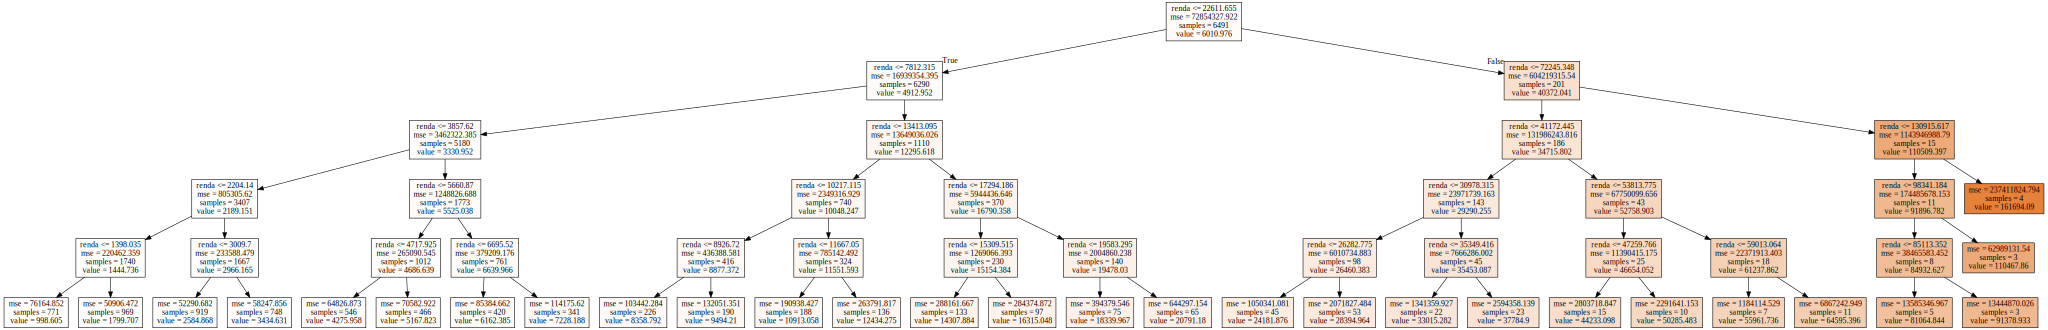

In [10]:

X = previsao_de_renda_dammy.drop(columns = ['tempo_emprego', 'sexo', 'tipo_renda_Empresário', 'idade', 'educacao_Superior_completo']).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size=0.75, random_state=2360873)

arvore_train = DecisionTreeRegressor(max_depth = 5, min_samples_leaf = 3)

arvore_train.fit(X_train, y_train)

mse1 = arvore_train.score(X_train, y_train)

result = "O R - quadrado da árvore com profundidade = {0} é: {1:.2f}"

print(result.format(arvore_train.get_depth(),mse1).replace(".",","))

graf_arv_2 = tree.export_graphviz(arvore_train, out_file=None, feature_names=X.columns,filled=True)

plot_2 = graphviz.Source(graf_arv_2, format="png") 

plot_2

# Aqui estamos explicando 100% da varaiabilidade da variável resposta
